<a href="https://colab.research.google.com/github/hongkwangpyo/2020_dip_learning/blob/master/0810_1_keras_DDN_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from collections import Counter

from sklearn.preprocessing import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [11]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
df = pd.DataFrame(iris.data, columns=['ls', 'sw', 'pl', 'pw'])
df.head()

,ls,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [76]:
x = df
y = iris.target

In [77]:
y = to_categorical(y).astype('int')
y[0]

array([1, 0, 0])

# 신경망을 생성하고 학습을 통해 붓꽃의 종류를 예측하는 deep learning neural network를 만들고 예측하시오

In [78]:
y = pd.DataFrame(y)

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

In [85]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(4,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 512)               2560      
_________________________________________________________________
dense_37 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_39 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_40 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_41 (Dense)             (None, 3)                 99        
Total params: 177,219
Trainable params: 177,219
Non-trainable params: 0
________________________________________________

In [86]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy') # 그래디언트 adam

In [87]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 0s 64ms/step - loss: 1.0675 - accuracy: 0.4688 - val_loss: 0.9409 - val_accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 11ms/step - loss: 0.9147 - accuracy: 0.4479 - val_loss: 0.8309 - val_accuracy: 0.5417
Epoch 3/100
3/3 [==============================] - 0s 10ms/step - loss: 0.7477 - accuracy: 0.6979 - val_loss: 0.7186 - val_accuracy: 0.5417
Epoch 4/100
3/3 [==============================] - 0s 9ms/step - loss: 0.6272 - accuracy: 0.6979 - val_loss: 0.6335 - val_accuracy: 0.5417
Epoch 5/100
3/3 [==============================] - 0s 10ms/step - loss: 0.5235 - accuracy: 0.6979 - val_loss: 0.5659 - val_accuracy: 0.5417
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 0.4393 - accuracy: 0.8333 - val_loss: 0.4758 - val_accuracy: 0.9583
Epoch 7/100
3/3 [==============================] - 0s 9ms/step - loss: 0.3734 - accuracy: 0.8646 - val_loss: 0.4056 - val_accuracy: 0.9167
Epoch 8/100
3/3 [======

In [88]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

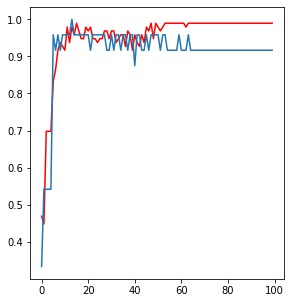

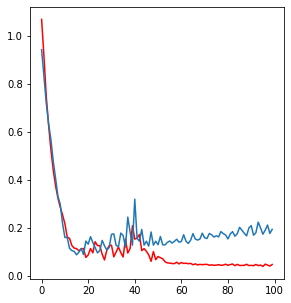

In [89]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'], color='r') # train data => 과적합중
plt.plot(hist.history['val_accuracy']) # test data => 비슷
plt.figure(figsize=(10,5))

plt.subplot(1,2,2)
plt.plot(hist.history['loss'], color='r') 
plt.plot(hist.history['val_loss']) 

In [90]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.1158 - accuracy: 0.9333


[0.1158495768904686, 0.9333333373069763]